<a href="https://colab.research.google.com/github/YuliiaHudz/Data-Analytics-Projects/blob/main/Data_Visualization_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This script is focused on **data visualization** using **Matplotlib** to analyze online store sales data. It involves loading a dataset (`sales.csv`) and creating different types of charts to explore key business insights.  

### **Key Steps in the Script:**  
✅ **Load the dataset** (`sales.csv`) containing order details, customer information, product categories, sales, profit, and shipping costs.  

✅ **Histogram**: Visualizes the distribution of sales (`sales`). Helps identify the most common sales values and overall distribution shape.  

✅ **Line Chart**: Shows sales trends over time (`order_date`). Ensures the `order_date` column is in the correct format before plotting. This helps analyze **purchase patterns over time**.  

✅ **Bar Chart**: Displays the **number of orders per product category** (`product_category`). This reveals the most and least popular product categories.  

✅ **Scatter Plot**: Examines the relationship between **profit (`profit`) and total sales (`sales`)**. This helps determine whether higher sales correlate with higher profit.  

✅ **2x2 Subplot Grid**: Combines all four charts into a **single figure** for easier comparison.  

This task strengthens **data visualization skills**, helping uncover patterns and relationships in sales data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting to Google Drive (works in Google Colab)
from google.colab import drive
drive.mount("/content/drive")

# Changing the working directory to the folder containing the CSV files
%cd /content/drive/MyDrive/Mate_Homework/

# Loading the CSV files
sales_data = pd.read_csv("sales_data.csv")

sales_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Mate_Homework


,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-01,10:11:40,5.0,29317,Male,Web,Member,Auto & Accessories,Car Media Players,140.0,4.0,0.3,43.2,4.3,Medium,e_wallet
1,2018-01-01,22:30:44,7.0,42270,Male,Web,Member,Auto & Accessories,Car Pillow & Neck Rest,231.0,5.0,0.1,139.5,13.9,High,money_order
2,2018-01-01,21:55:31,10.0,14563,Male,Web,Member,Auto & Accessories,Car Speakers,211.0,5.0,0.1,120.5,12.0,High,credit_card
3,2018-01-01,13:57:15,9.0,58601,Male,Web,Member,Auto & Accessories,Tyre,250.0,4.0,0.2,150.0,15.0,Critical,credit_card
4,2018-01-01,15:17:41,2.0,48342,Male,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.1,165.0,16.5,High,credit_card


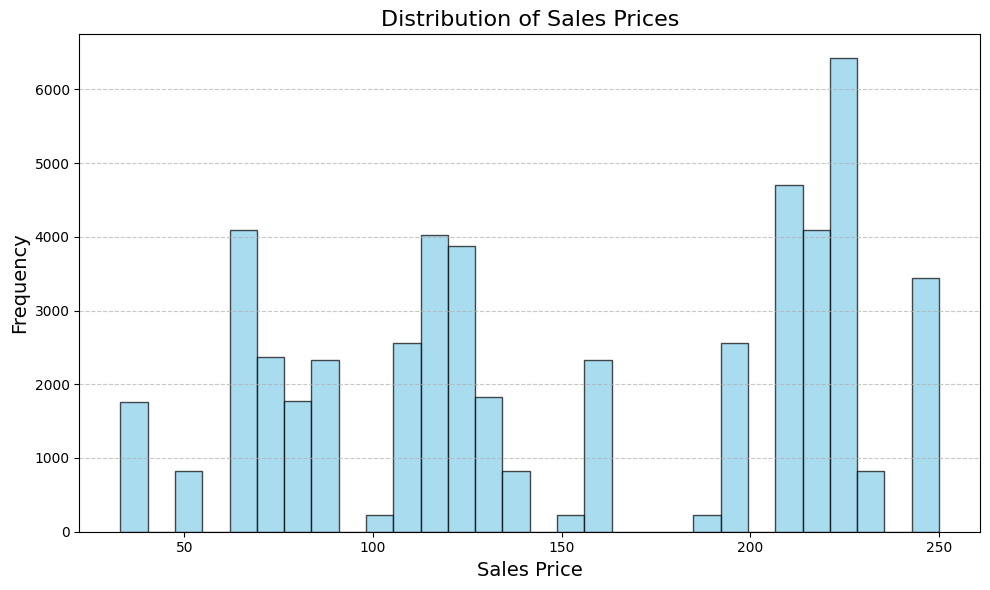

In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(sales_data["Sales"], bins=30, color="skyblue", edgecolor="black", alpha=0.7)

# Add titles and labels
plt.title("Distribution of Sales Prices", fontsize=16)
plt.xlabel("Sales Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Display the plot
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

The histogram shows a bimodal distribution of sales prices, with peaks around $50-$100 and $200-$250, indicating two dominant price ranges. This suggests the presence of distinct product categories, such as standard and premium items. Sales are significantly lower in the middle range (around $150), revealing a potential gap in the pricing strategy. Introducing products in this price range could attract additional customers and increase overall sales.

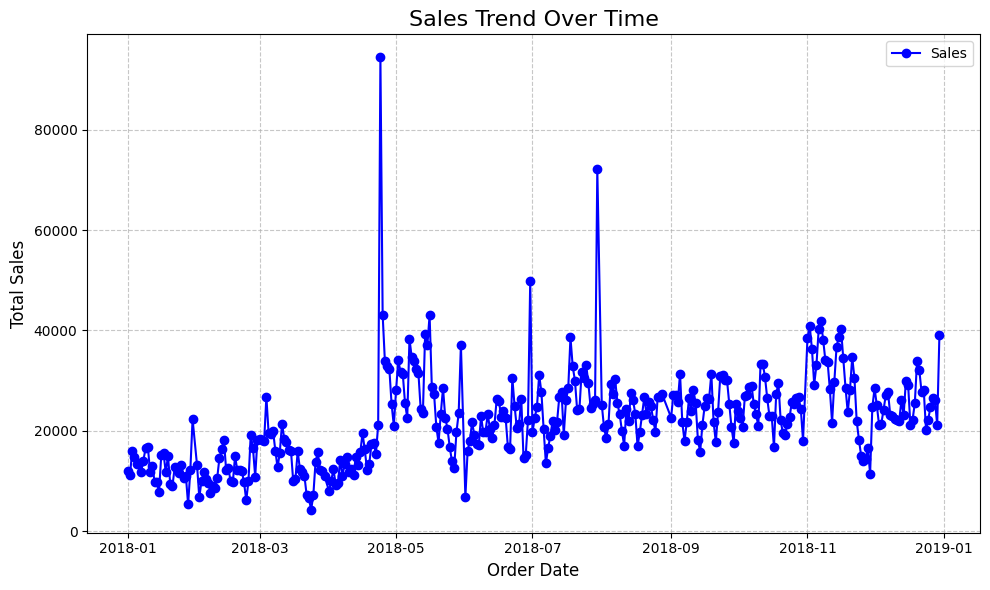

In [ ]:
# Ensure the order_date column is in datetime format
sales_data["Order_Date"] = pd.to_datetime(sales_data["Order_Date"])

# Group data by date and calculate total sales per day
daily_sales = sales_data.groupby("Order_Date")["Sales"].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(daily_sales["Order_Date"], daily_sales["Sales"], marker='o', linestyle='-', color='b', label="Sales")

# Customize the chart
plt.title("Sales Trend Over Time", fontsize=16)
plt.xlabel("Order Date", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

Sales generally show an upward trend, with significant spikes observed in specific periods, such as early 2018 and mid-2018. These peaks likely indicate promotional events, seasonal demand, or other anomalies in the data. Overall, the chart provides a clear view of sales dynamics, with regular fluctuations and occasional sharp increases.


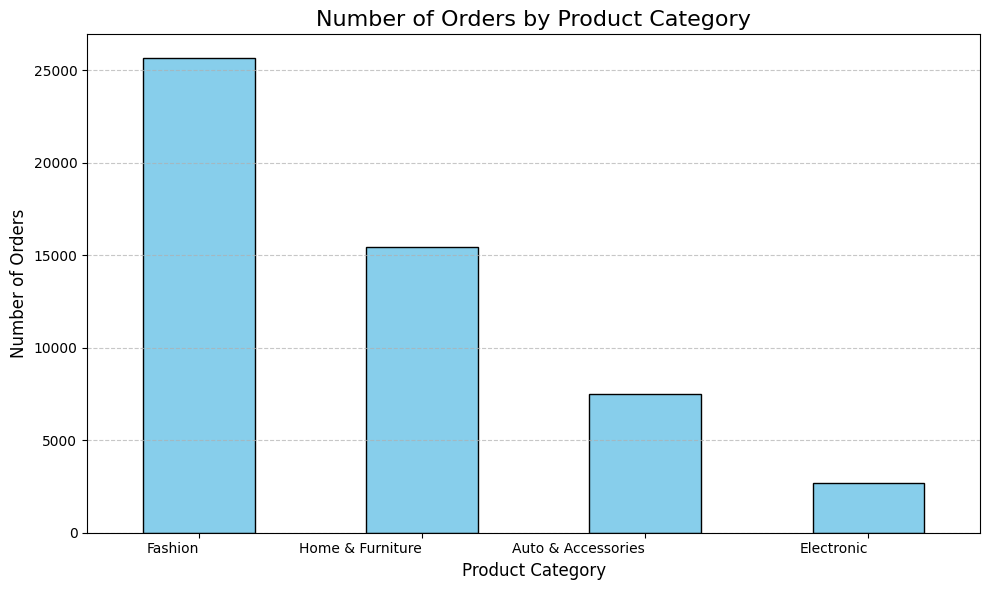

In [ ]:
# Grouping the data by product category and counting orders
order_counts = sales_data.groupby("Product_Category").size()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
order_counts.sort_values(ascending=False).plot(kind="bar", color="skyblue", edgecolor="black")

# Customizing the chart
plt.title("Number of Orders by Product Category", fontsize=16)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=0, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Displaying the chart
plt.tight_layout()
plt.show()

Based on the bar chart, the most popular product category is Fashion, with over 25,000 orders. The least popular category is Electronic, with fewer than 5,000 orders.

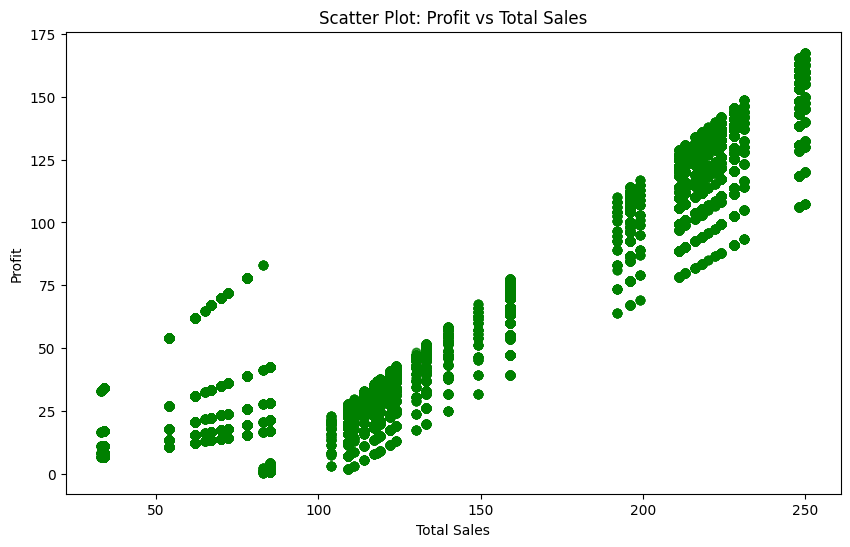

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sales_data["Sales"], sales_data["Profit"], color="green", alpha=0.5)

# Add labels and title
plt.xlabel("Total Sales")
plt.ylabel("Profit")
plt.title("Scatter Plot: Profit vs Total Sales")

# Show the plot
plt.show()

The scatter plot illustrates a strong positive linear relationship between profit and total sales. As sales increase, so does profit. However, there's some variability in the data, suggesting that other factors might also influence profit. A linear regression model could be a good fit to quantify this relationship and predict future profits based on sales.

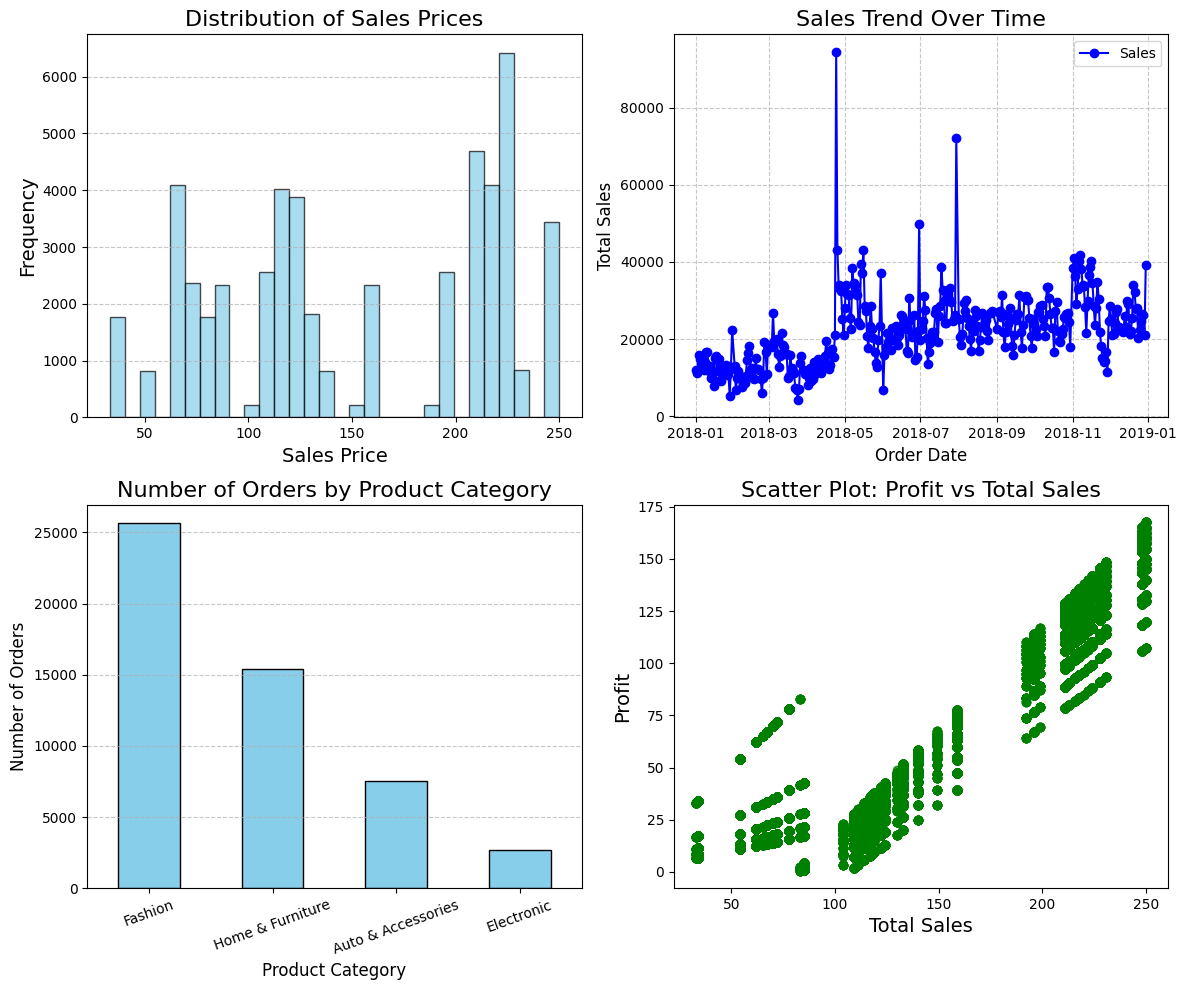

In [ ]:
# Create a 2x2 grid of plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# 1. Histogram of Sales Prices
axs[0, 0].hist(sales_data["Sales"], bins=30, color="skyblue", edgecolor="black", alpha=0.7)
axs[0, 0].set_title("Distribution of Sales Prices", fontsize=16)
axs[0, 0].set_xlabel("Sales Price", fontsize=14)
axs[0, 0].set_ylabel("Frequency", fontsize=14)
axs[0, 0].grid(axis="y", linestyle="--", alpha=0.7)

# 2. Sales Trend Over Time (Line plot)
axs[0, 1].plot(daily_sales["Order_Date"], daily_sales["Sales"], marker='o', linestyle='-', color='b', label="Sales")
axs[0, 1].set_title("Sales Trend Over Time", fontsize=16)
axs[0, 1].set_xlabel("Order Date", fontsize=12)
axs[0, 1].set_ylabel("Total Sales", fontsize=12)
axs[0, 1].grid(True, linestyle='--', alpha=0.7)
axs[0, 1].legend()

# 3. Number of Orders by Product Category (Bar chart)
order_counts.sort_values(ascending=False).plot(kind="bar", ax=axs[1, 0], color="skyblue", edgecolor="black")
axs[1, 0].set_title("Number of Orders by Product Category", fontsize=16)
axs[1, 0].set_xlabel("Product Category", fontsize=12)
axs[1, 0].set_ylabel("Number of Orders", fontsize=12)
axs[1, 0].tick_params(axis="x", rotation=20)
axs[1, 0].grid(axis="y", linestyle="--", alpha=0.7)

# 4. Scatter Plot: Profit vs Total Sales
axs[1, 1].scatter(sales_data["Sales"], sales_data["Profit"], color="green", alpha=0.5)
axs[1, 1].set_title("Scatter Plot: Profit vs Total Sales", fontsize=16)
axs[1, 1].set_xlabel("Total Sales", fontsize=14)
axs[1, 1].set_ylabel("Profit", fontsize=14)

# Adjust layout to avoid overlapping subplots
plt.tight_layout()

# Display the plot
plt.show()